In [9]:
# 2 color graph coloring problem circuit
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer, execute
from qiskit.tools.visualization import plot_histogram
import networkx as nx

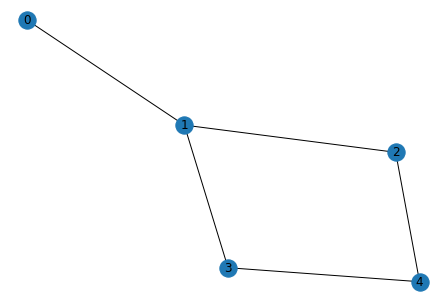

In [10]:
# Define the graph by giving the ends of each edge

g = [(0,1), (1,2), (1,3), (2,4), (3,4)]

nNodes=max(max(g))+1
nEdges=len(g)
nodes = list(range(nNodes))

# view the graph
ngx = nx.Graph()
for i in g:
    ngx.add_edge(i[0], i[1])
nx.draw(ngx, with_labels=True)

In [11]:
# Create a Quantum Circuit
q = QuantumRegister(nNodes+nEdges)
c = ClassicalRegister(nNodes)
qc = QuantumCircuit(q,c)


In [12]:
# Add the gates to the circuit for each edge in the graph
qc.h(nodes)
k = nNodes
for edge in g:
    i = edge[0]
    j = edge[1]
    qc.ccx(i,j,k)
    qc.x(i)
    qc.x(j)
    qc.ccx(i,j,k)
    qc.x(i)
    qc.x(j)
    qc.cx(k,j)
    qc.barrier()
    k += 1


In [13]:
# measure all the input qubits
for i in nodes:
    qc.measure(i,c[i])


{'10010': 500, '01101': 524}


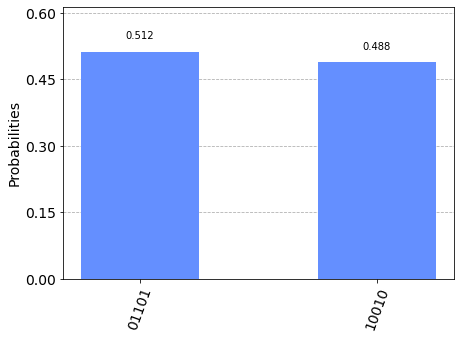

In [14]:
# Use Aer's qasm_simulator
backend_qasm_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend_qasm_sim, shots=1024)

# display the results
result_qasm_sim = job_sim.result()
print(result_qasm_sim.get_counts())
plot_histogram(result_qasm_sim.get_counts())


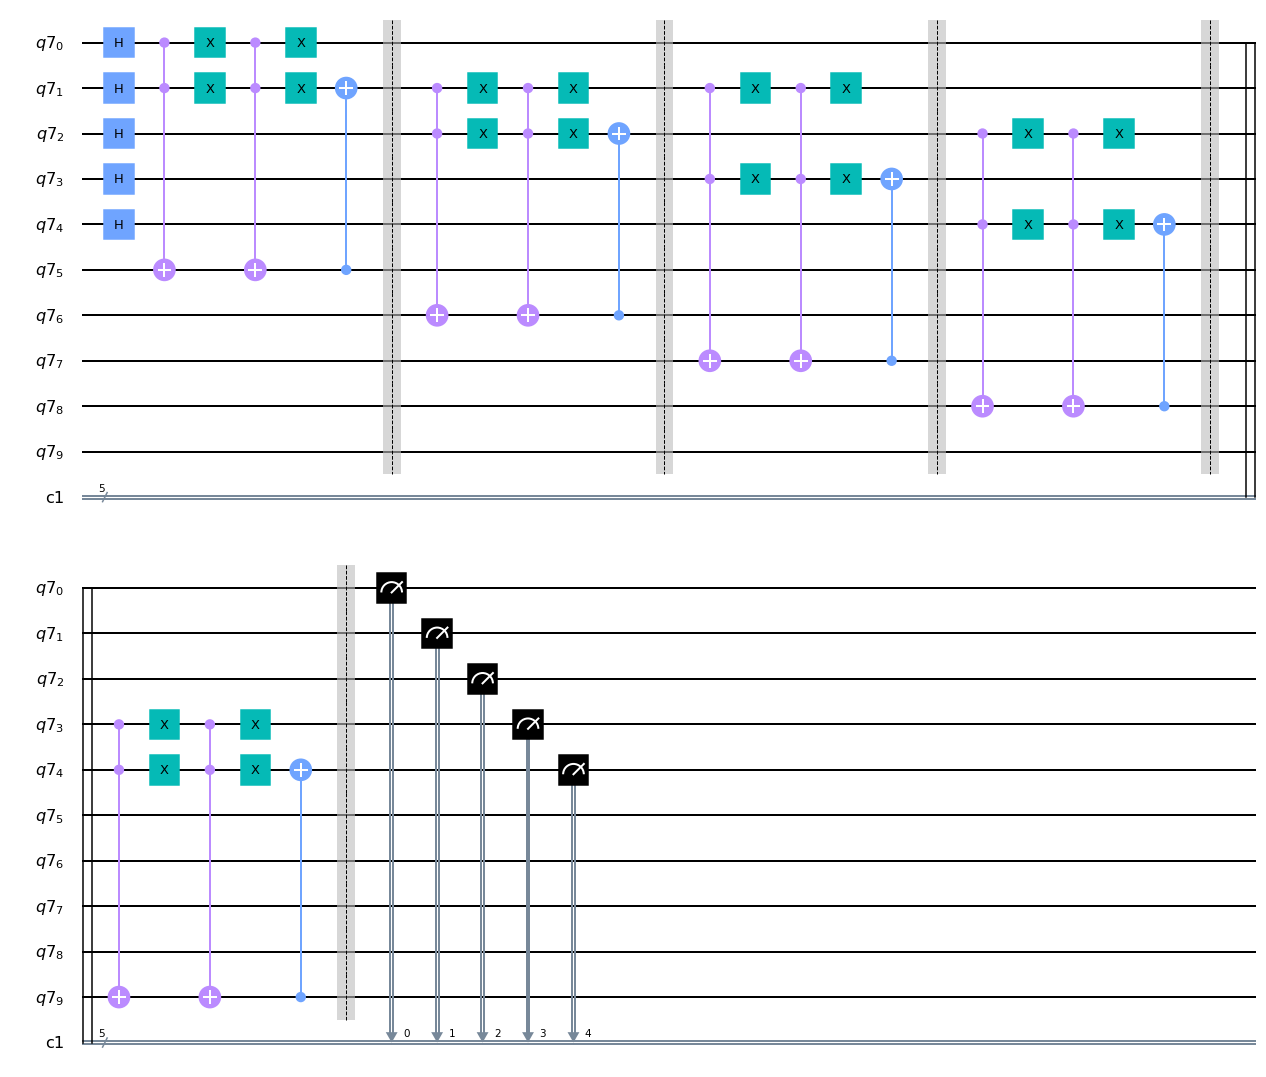

In [15]:
#--------------- Drawing
qc.draw(output='mpl')

In [16]:
c = result_qasm_sim.get_counts()

colormaps = []

for key in c:
    colormap = []
    for i in reversed(key):
        if i == '0':
            colormap.append('red')
        else:
            colormap.append('blue')
    colormaps.append(colormap)


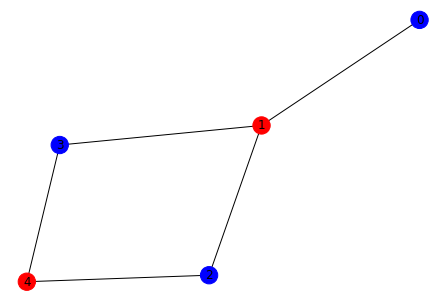

In [17]:
nx.draw(ngx, node_color=colormaps[1], with_labels=True)

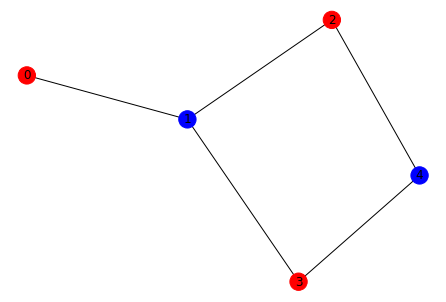

In [18]:
nx.draw(ngx, node_color=colormaps[0], with_labels=True)